In [ ]:
#4.2.1 평균 제곱 오차
import numpy as np

t= [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
  return 0.5*np.sum((y-t)**2)


In [ ]:
# 2일 확률이 가장 높다고 추정함
y = [0.2, 0.05, 0.6, 0.0, 0.05, 0.05,0.0, 0.05, 0.0, 0.0]   
mean_squared_error(np.array(y), np.array(t))            #오차 낮음

0.10500000000000002

In [ ]:
# 3일 확률이 가장 높다고 추정함
y = [0.2, 0.05, 0.0, 0.6, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))          #오차 높음

0.705

In [ ]:
#4.2.2 교차 엔트로피 오차

t= [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

In [ ]:
# 2일 확률이 가장 높다고 추정함
y = [0.2, 0.05, 0.6, 0.0, 0.05, 0.05,0.0, 0.05, 0.0, 0.0]   
cross_entropy_error(np.array(y), np.array(t))            #오차 낮음

0.510825457099338

In [ ]:
# 3일 확률이 가장 높다고 추정함
y = [0.2, 0.05, 0.0, 0.6, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))          #오차 높음

16.11809565095832

In [7]:
#4.2.3 미니배치 학습 
import sys
import os
sys.path.append(os.pardir)
from mnist import load_mnist
import matplotlib.pylab as plt

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

print(x_train.shape)  
print(t_train.shape)  


(60000, 784)
(60000,)


In [ ]:
#램덤으로 10개를 뽑는다.

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(6000, 10)

array([ 753, 4096, 3728, 3395,  419,  266, 4092,  851, 2087, 4356])

In [ ]:
# 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

#정답 레이블이 원-핫 인코딩인 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y+1e-7)) / batch_size

In [ ]:
#정답 레이블이 숫자 레이블인 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t]+1e-7)) / batch_size

In [ ]:
# 4.3.1 미분
# 나쁜 구현 예

def numerical_diff_bad(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [ ]:
np.float32(1e-50)

0.0

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [ ]:
# 4.3.2 수치 미분의 예

def function_1(x):
    return 0.01*x**2 + 0.1*x

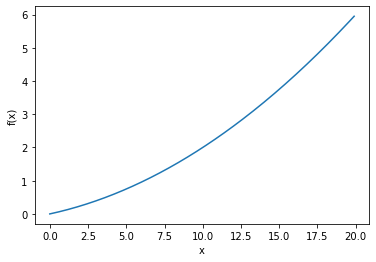

In [ ]:
x = np.arange(0.0, 30.0, 0.1) 
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
print(numerical_diff(function_1, 5))   
print(numerical_diff(function_1, 10)) 

0.1999999999990898
0.2999999999986347


In [ ]:
# 4.3.3 편미분

def function_2(x):
    return x[0]**2 + x[1]**2


In [ ]:
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

In [ ]:
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1

In [ ]:
print(numerical_diff(function_tmp1, 3.0))  
print(numerical_diff(function_tmp2, 4.0))  

6.00000000000378
7.999999999999119


In [ ]:
#4.4 기울기

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  

    return grad

In [ ]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # [ 6.  8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # [ 0.  4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # [ 6.  0.]

[6. 8.]
[0. 4.]
[6. 0.]


In [ ]:
#4.4.1 경사법(경사 하강법)

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
# 학습률이 너무 큼
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
# 학습률이 너무 작음
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [ ]:
sys.path.append(os.pardir)
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

# 4.4.2 신경망에서의 기울기
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


In [ ]:
net = simpleNet()
print(net.W)  

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))  

t = np.array([0, 0, 1])  
print(net.loss(x, t))


[[ 0.37844373 -0.96011868  0.88665846]
 [-1.11394563  0.35703541  0.07191872]]
[-0.77548483 -0.25473934  0.59672193]
2
0.5189945858946563


In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.09053423  0.15239464 -0.24292887]
 [ 0.13580134  0.22859196 -0.3643933 ]]


In [ ]:
#lambda로 표현

f = lambda w: net.loss(x, t)
dW = dW = numerical_gradient(f, net.W)

In [ ]:
#4.5.1 2층 신경망 클래스 구현하기 

sys.path.append(os.pardir) 
from functions import *
from gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

In [ ]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [ ]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [4]:
 %cd /content/drive/My\ Drive/DL

/content/drive/My Drive/DL


In [5]:
from mnist import load_mnist
from two_layer_net import TwoLayerNet
import sys,os
sys.path.append(os.pardir)
import numpy as np

# 4.5.2 미니배치 학습 구현하기

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list=[]

# 하이퍼 파라메터
iters_num = 10000 
train_size = x_train.shape[0]
batch_size = 100  
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) #성능 개선판

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)



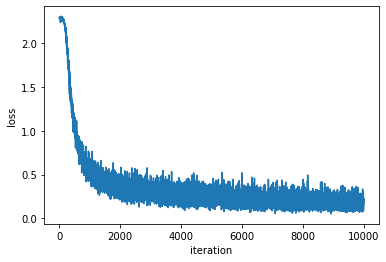

In [8]:
x = np.arange(0.0, 10000, 1) 
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(x, train_loss_list)
plt.show()

In [9]:
sys.path.append(os.pardir)
# 4.5.3 시험 데이터로 평가하기

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

iters_num = 10000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) 

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.8205833333333333, 0.8213
train acc, test acc | 0.8830833333333333, 0.887
train acc, test acc | 0.9001166666666667, 0.9028
train acc, test acc | 0.9076333333333333, 0.9105
train acc, test acc | 0.9147, 0.9163
train acc, test acc | 0.91805, 0.9199
train acc, test acc | 0.9223, 0.9231
train acc, test acc | 0.92615, 0.927
train acc, test acc | 0.9304333333333333, 0.9322
train acc, test acc | 0.9326166666666666, 0.9344
train acc, test acc | 0.936, 0.9366
train acc, test acc | 0.93865, 0.939
train acc, test acc | 0.94085, 0.9386
train acc, test acc | 0.9427666666666666, 0.9415
train acc, test acc | 0.9444833333333333, 0.9428
train acc, test acc | 0.9459, 0.9445


In [10]:
print(len(train_acc_list))
print(len(test_acc_list))

17
17


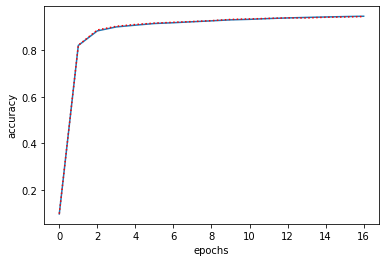

In [17]:
x1 = np.arange(0, 17, 1) 
x2 = np.arange(0, 17, 1) 
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(x1, train_acc_list)
line2 = plt.plot(x2, test_acc_list)
plt.setp(line2, color='r', linestyle = ':')
plt.show()